# Project Proposal: 

# Comparing Insulin Level across Individuals With and Without Breast Cancer

Group 16: Benjamin Gerochi, Mia Ling, Jessie Megan, Hejia Qiu

# I. Introduction

Breast cancer happens when the abnormal growth of breast cells leads to the formation of tumors (World Health Organization [WHO], 2023). An increase in insulin secretion due to insulin resistance is hypothesized to be a risk factor for breast cancer (Srinivasan et al., 2022). However, no existing evidence can give a definite conclusion regarding this issue (Cust et al., 2008). Thus, we want to study whether people who got breast cancer typically have a higher insulin level than those who are healthy. We will use the difference in means and the difference in medians of insulin as parameters. Mean and median are good at measuring the center of the data, and median works well with presence of outliers (Döring, 2018). Therefore, they can satisfy our interest in typical differences in insulin levels.

The dataset, “Breast Cancer Coimbra,” contains 116 observations, where 64 are from breast cancer patients and 52 are from healthy people. There are 10 columns, with 9 quantitative variables collected from blood analysis and 1 categorical variable (Diagnosis), which shows whether an observation is from a breast cancer patient or healthy control (Patrcio et al., 2018). The variables we focused on to perform our hypothesis test and construct confidence intervals will be Insulin and Diagnosis.


# II. Preliminary Result

In [1]:
# please run this before run all other cells
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## 1. Demonstrate that the dataset can be read from the web into R.

In [2]:
# Read using Google Drive direct output link (directly read from web; no need for xlsx file)

breast_cancer <- read_csv("https://drive.google.com/uc?export=download&id=1Qd3yeNQcVt0IfO_hQpZi-jivJ28uMxl4")
head(breast_cancer)

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


## 2. Clean and wrangle the data into a tidy format.

In [3]:
# Cleaned the dataset for more clarity by: 
# 1. Renaming the classification column to diagnosis
# 2. Changing its values from 1 and 2 to Healthy and Sick
# 3. Selecting only the 2 relevant columns (Diagnosis and Insulin)

breast_cancer_tidy <- breast_cancer %>%
rename(Diagnosis = Classification) %>%
mutate(Diagnosis = ifelse(Diagnosis == 2, "Sick", "Healthy")) %>%
filter(!is.na(Insulin)) %>%
select(Diagnosis, Insulin)

head(breast_cancer_tidy)

Diagnosis,Insulin
<chr>,<dbl>
Healthy,2.707
Healthy,3.115
Healthy,4.498
Healthy,3.226
Healthy,3.549
Healthy,3.226


## 3. Plot the relevant raw data, tailoring the plot in a way that addresses the question.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


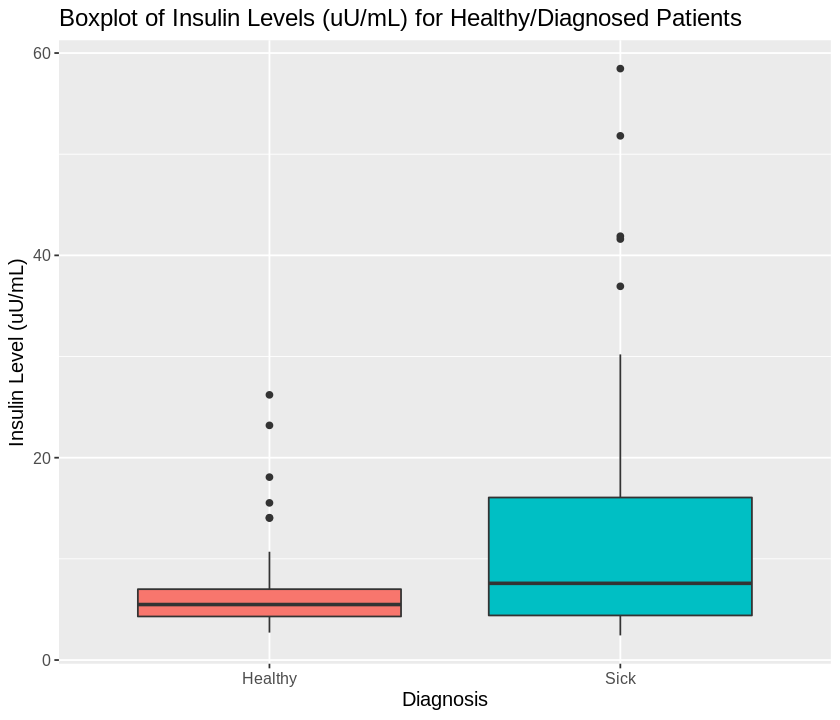

In [4]:
# Visualizing a Boxplot of the distributions of insulin levels for Healthy and Sick patients

options(repr.plot.width = 7, repr.plot.height = 6)

insulin_boxplots <-
    breast_cancer_tidy %>% 
    ggplot() +
    geom_boxplot(aes(x = Diagnosis, y = Insulin, fill = Diagnosis)) +
    theme(text = element_text(size = 12)) +
    ggtitle("Boxplot of Insulin Levels (uU/mL) for Healthy/Diagnosed Patients") + 
    xlab("Diagnosis") + 
    ylab("Insulin Level (uU/mL)") + 
    guides(fill = FALSE)

insulin_boxplots

These two boxplots compare the insulin level of healthy people and sick patients. 

The plot shows insulin levels for healthy people and patients are right-skewed. Besides, The median insulin level of healthy people is slightly lower than that of sick patients.

The range of the middle 50% of the distribution is narrower for healthy people. The upper 50% range insulin level of sick patients is much higher than healthy people. The length of the boxplot indicates that the insulin level of sick people is more spread out.

In both diagnoses, there are outliers, which indicate an unusually high insulin level that may need further investigation.

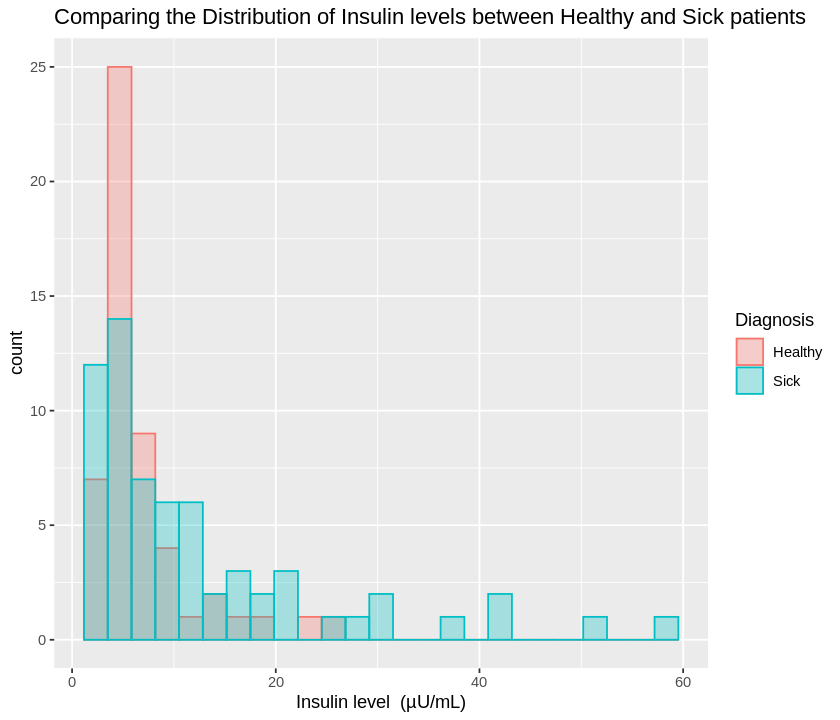

In [5]:
# Creating a layered histogram to compare the distributions of insulin levels between Sick and Healthy patients

histogram_compare <- ggplot(breast_cancer_tidy, aes(x = Insulin, fill = Diagnosis, colour = Diagnosis)) + 
  geom_histogram(bins=25, alpha = 0.3, position = "identity") +
  ggtitle("Comparing the Distribution of Insulin levels between Healthy and Sick patients") +
  xlab("Insulin level  (µU/mL)")

histogram_compare

According to the above histogram comparison, the center of the distribution for healthy people is at about 7µU/mL, which is smaller than that of the patients with breast cancer (about 10µU/mL). The insulin levels of sick patients have a higher range and are more right-skewed than the healthy. There are more sick patients who tend to have high levels of insulin.


## 4. Compute estimates of the parameters identified across the groups. Present this in a table. 

In [6]:
# Table Presentation of Computed Estimates for Difference in Mean and Median

parameter_estimates <- breast_cancer_tidy %>%
group_by(Diagnosis) %>%
summarize(mean = mean(Insulin),
          median = median(Insulin)) %>%
pivot_longer(names_to = "Estimator", 
             values_to = "Values",
             cols = c(mean, median)) %>%
pivot_wider(names_from = Diagnosis,
            values_from = Values) %>%
mutate(Difference = Sick - Healthy)

parameter_estimates

Estimator,Healthy,Sick,Difference
<chr>,<dbl>,<dbl>,<dbl>
mean,6.933769,12.51322,5.57945
median,5.483500,7.58000,2.09650


# III. Method


## Trust Worthy
The dataset in this analysis is from a reputable source, the UC Irvine Machine Learning Repository. The usage of confidence intervals and hypothesis testing can make the report trustworthy because confidence intervals let us understand the range of possible values for our parameter and how confident we are, while hypothesis testing gives us information on how plausible our observed statistics are under hypothesized parameters (Ismay & Kim, 2023). We get a sense of the reliability of our results.
## Improving Gap
The plots and estimates produced are not enough to be given to stakeholders as they are information from one sample, but due to sampling variation, different samples may produce different estimates. It’s not proper to conclude about our question only considering estimates from a single sample. Hypothesis testing and confidence intervals can address this gap since they address sampling variation. 

The hypotheses to be tested are:

H0: There is no difference in insulin levels between healthy individuals and breast cancer patients 

Ha: Breast cancer patients have higher insulin levels compared to healthy individuals.

The confidence interval is set to a commonly used value of 95% and the significance level is set to 5% (Ismay & Kim, 2023). We plan to report the confidence intervals to show plausible values for differences. We will also report p-values, and if the p-value is smaller than 5%, we can reject the null hypothesis.

In performing hypothesis testing and confidence intervals, we will use both the asymptotic method and bootstrapping for the mean since the sample size is large enough, while only using bootstrapping for the median. The asymptotic method involves mathematical formulas, while bootstrapping is versatile and applicable for many types of statistics (Ismay & Kim, 2023).

## Expectations and Implications
We expected that breast cancer patients have a higher insulin level compared to healthy individuals. If this is true, individuals would better understand the importance of monitoring insulin levels regularly. Some future questions this finding can lead to include:

-Does higher insulin level correlate to higher severity of breast cancer?

-Does the relationship between insulin level and breast cancer vary between different age groups?



# IV. Reference

Cust, A. E., Stocks, T., Lukanova, A., Lundin, E., Hallmans, G., Kaaks, R., Jonsson, H., & Stattin, P. (2008). The influence of overweight and insulin resistance on breast cancer risk and tumour stage at diagnosis: A prospective study. Breast Cancer Research and Treatment, 113(3), 567–576. https://doi.org/10.1007/s10549-008-9958-8  


Döring, M. (2018, October 26). Mean vs median: When to use which measure?. Data Science Blog: Understand. Implement. Succeed. https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/ 

Ismay, C., & Kim, A. Y. (2023). Statistical Inference via data science. Statistical Inference via Data Science. https://moderndive.com/  
Patrcio, M., Pereira, J., Crisstomo, J., Matafome, P., Seia, R., & Caramelo, F. (2018, March 5). Breast cancer coimbra. UCI Machine Learning Repository. https://doi.org/10.24432/C52P59 

Srinivasan, M., Arzoun, H., GK, L. B., & Thangaraj, S. R. (2022). A systematic review: Does insulin resistance affect the risk and survival outcome of breast cancer in women? Cureus. https://doi.org/10.7759/cureus.21712 

World Health Organization. (2023, July). Breast cancer. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/breast-cancer 
